In [88]:
import csv 
import pandas as pd
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
from textblob import TextBlob
!pip install wordcloud #this is the module
from wordcloud import WordCloud #we need the function; we dont need the whole module 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import warnings
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA


# read the csv file into a pandas dataframe
tinder_df = pd.read_csv('tinder.csv')

# print the first 5 rows of the dataframe
print(tinder_df.head())


       id                                               url  \
0  95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
1  95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
2  95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
3  95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
4  95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   

                                            comments  
0  Sonnet:  That's impressive\n\n1st message: Wow...  
1  Jesus christ you even wrote it in iambic penta...  
2  The problem with trying to repeat this after p...  
3  “What if I told you to read the first letter o...  
4  Send Nudes Emilia\n\nWanna Smash\n\nPhone numb...  


In [89]:
# convert float values to string values
tinder_df['comments'] = tinder_df['comments'].astype(str)

# define function to preprocess text
def preprocess_text(comments):
    # remove certain punctuation marks
    for char in ['!', '?', '@', '\'' , '/' , '.', ',','’', '"',]:
        comments = comments.replace(char, '')
    # remove remaining punctuation and convert to lower case
    comments = comments.translate(str.maketrans('', '', string.punctuation)).lower()
    return comments

# apply the preprocess_text function to the 'comments' column of the dataframe
tinder_df['comments'] = tinder_df['comments'].apply(preprocess_text)

print (tinder_df)

            id                                               url  \
0       95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
1       95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
2       95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
3       95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
4       95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
...        ...                                               ...   
166108  q17gzs  https://www.reddit.com/r/Tinder/comments/q17gzs/   
166109  q17gzs  https://www.reddit.com/r/Tinder/comments/q17gzs/   
166110  q17gzs  https://www.reddit.com/r/Tinder/comments/q17gzs/   
166111  q17gzs  https://www.reddit.com/r/Tinder/comments/q17gzs/   
166112  q17gzs  https://www.reddit.com/r/Tinder/comments/q17gzs/   

                                                 comments  
0       sonnet  thats impressive\n\n1st message wow th...  
1       jesus christ you even wrote it in iambic penta...  
2  

In [90]:
comments = tinder_df['comments']

# download required NLTK packages
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# define manual stopwords
#manual_stopwords = ['this', 'is', 'the', 'to', 'on','be','that','im','am','I','thats','you','youre']

# add manual stopwords to existing set of stopwords
#stop_words = set(stopwords.words('english')).union(['youve','dont','yeah','shouldve','ill','this', 'is', 'the', 'to', 'on','be','that','im','am','I','thats','you','youre'])
#print (stop_words)

[nltk_data] Downloading package punkt to /Users/palashis/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/palashis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/palashis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [91]:
# define function to tokenize, lemmatize, and stem text
def process_text(comments):
    # tokenize text into individual words
    tokens = word_tokenize(comments)

    # remove stop words
    stop_words = set(stopwords.words('english')).union(['guy', 'date', 'would', 'guys','women','woman', 'fucking', 'fuck','know', 'people', 'think', 'like','youve','dont','yeah','shouldve','ill','this', 'is', 'the', 'to', 'on','be','that','im','am','I','thats','you','youre'])
    tokens = [word for word in tokens if word.lower() not in stop_words]

    return tokens

# apply the process_text function to each comment in the comments DataFrame
tinder_df['comments'] = tinder_df['comments'].apply(process_text)



In [58]:
tinder_df['comments'] = tinder_df['comments'].astype(str)
print(tinder_df)

            id                                               url  \
0       95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
1       95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
2       95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
3       95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
4       95bg2p  https://www.reddit.com/r/Tinder/comments/95bg2p/   
...        ...                                               ...   
166108  q17gzs  https://www.reddit.com/r/Tinder/comments/q17gzs/   
166109  q17gzs  https://www.reddit.com/r/Tinder/comments/q17gzs/   
166110  q17gzs  https://www.reddit.com/r/Tinder/comments/q17gzs/   
166111  q17gzs  https://www.reddit.com/r/Tinder/comments/q17gzs/   
166112  q17gzs  https://www.reddit.com/r/Tinder/comments/q17gzs/   

                                                 comments  
0       ['sonnet', 'impressive', '1st', 'message', 'wo...  
1       ['jesus', 'christ', 'even', 'wrote', 'iambic',...  
2  

In [59]:
polarity=[] 
subjectivity=[] 

for i in tinder_df['comments']: 
     try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
     except: #if polarity of a particular comment cannot be calculated then it is set to 0 
        polarity.append(0)
        subjectivity.append(0)
        
        
tinder_df['polarity']=polarity
tinder_df['subjectivity']=subjectivity

tinder_df



,id,url,comments,polarity,subjectivity
0,95bg2p,https://www.reddit.com/r/Tinder/comments/95bg2p/,"['sonnet', 'impressive', '1st', 'message', 'wo...",0.020000,0.600000
1,95bg2p,https://www.reddit.com/r/Tinder/comments/95bg2p/,"['jesus', 'christ', 'even', 'wrote', 'iambic',...",0.000000,0.100000
2,95bg2p,https://www.reddit.com/r/Tinder/comments/95bg2p/,"['problem', 'trying', 'repeat', 'posting', 're...",0.800000,0.700000
3,95bg2p,https://www.reddit.com/r/Tinder/comments/95bg2p/,"['“', 'told', 'read', 'first', 'letter', 'mess...",0.250000,0.333333
4,95bg2p,https://www.reddit.com/r/Tinder/comments/95bg2p/,"['send', 'nudes', 'emilia', 'wan', 'na', 'smas...",-0.200000,0.150000
...,...,...,...,...,...
166108,q17gzs,https://www.reddit.com/r/Tinder/comments/q17gzs/,"['mean', 'isnt', 'christianity', 'belief', 'sh...",-0.032292,0.564931
166109,q17gzs,https://www.reddit.com/r/Tinder/comments/q17gzs/,"['exactly', 'less', 'matches', 'better', 'go',...",0.277778,0.355556
166110,q17gzs,https://www.reddit.com/r/Tinder/comments/q17gzs/,"['wrong', 'thinking', 'word', 'adapting', 'one...",0.106277,0.692208
166111,q17gzs,https://www.reddit.com/r/Tinder/comments/q17gzs/,"['cool', 'clarify', 'say', '“', 'playful', 'te...",0.425000,0.575000


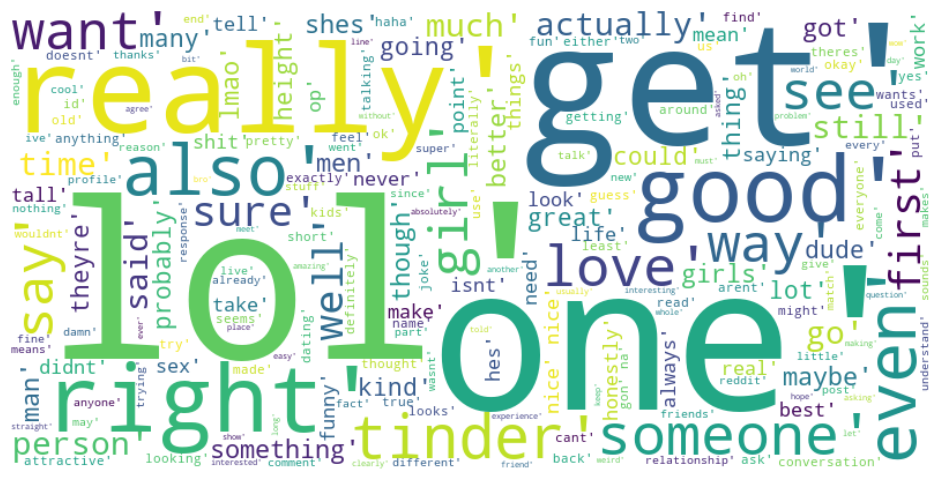

In [60]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# create a string of comments with polarity score < 0.25
comments_str = ' '.join(tinder_df[tinder_df['polarity'] > 0]['comments'])

# generate the wordcloud
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(comments_str)

# plot the wordcloud
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


/Users/palashis/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


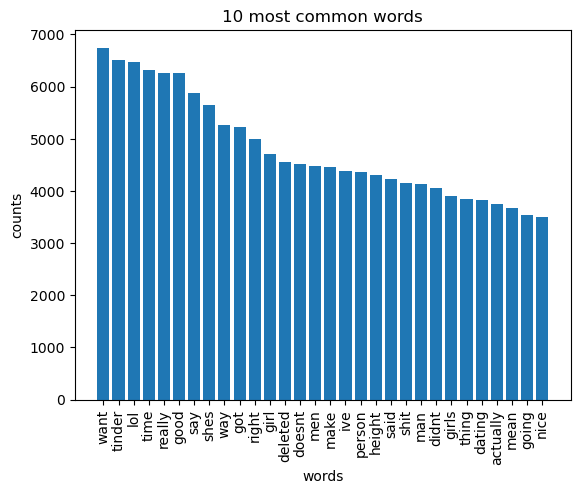

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
# create a CountVectorizer object
vectorizer = CountVectorizer()

#top ten common words 

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:30]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(tinder_df['comments'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

## Topic Analysis 

In [62]:
import warnings 
 
warnings.simplefilter("ignore", DeprecationWarning)

# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 5
number_words = 15

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)



Topics found via LDA:

Topic #0:
tinder want shes right dating person time theyre girl weird men red wrong man really

Topic #1:
good ive years got yes going tinder time year old really actually lot getting men

Topic #2:
height way tall really doesnt time short make want say person girl feel funny said

Topic #3:
deleted run na read gon book bro say wan bitch got bullet haha reading thanks

Topic #4:
nice lol got love shit oh thank day comment god damn ta reddit bot hes


/Users/palashis/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [82]:
def top_n_trigram(corpus): #defining the triagram functions 
    vec = CountVectorizer(ngram_range=(4, 4)).fit(corpus) #want three words (3 words that go together)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

In [83]:
dict_trigrams_tinder= {} #take pros and cons from data and see what happens there 
dict_trigrams_tinder = top_n_trigram(tinder_df['comments'])
#dict_trigrams_cons = top_n_trigram(df['cleancons'])

In [85]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from textblob import TextBlob
def bar_plot_toptrigrams(trigrams, reviewtype = 'Tinder'):
    common_words = trigrams[:20]
    df1 = pd.DataFrame(common_words, columns = ['word' , 'count'])
    fig = px.bar(df1, x='word', y='count')
    fig.update_layout(title_text= '{0} Review Tri-gram count top 20'.format(reviewtype), template="plotly_white")
    fig.show()

bar_plot_toptrigrams(dict_trigrams_bumble)